In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
data_dir = '/n/netscratch/pehlevan_lab/Lab/mgk/schema/cb_data_glr'

beta_vals = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
seeds = 100
trials = 50
mtype = 'res'  # 'sym' or 'res'
usenmc = False

stochlearn = False
glr = 1e-4 # stochlearn 1e-4, else: 

digtimes = np.zeros((len(beta_vals), seeds, 6))
totlats = np.zeros((len(beta_vals), seeds, trials + 6))

for b,beta in enumerate(beta_vals):
    for s in range(seeds):

        try:
            if mtype == 'sym':
                data = np.load(f'{data_dir}/obs_{mtype}_cb{beta}_{s}s_{usenmc}nmc.npz')
            else:
                data = np.load(f'{data_dir}/obs_{mtype}_cb{beta}_{s}s_{usenmc}nmc_{stochlearn}sl_{glr}glr.npz')

            digtimes[b,s,:] = data['totdgr']
            totlats[b,s,:] = data['totlat']
            # print(f"Loaded data for beta={beta}, seed={s}")
        except (FileNotFoundError, ValueError):
            print(f"File not found: {data_dir}/obs_{mtype}_cb{beta}_{s}.npz")
            digtimes[b,s,:] = np.nan
            totlats[b,s,:] = np.nan

[100 100 100 100 100 100 100 100 100 100 100]
[100 100 100 100 100 100 100 100 100 100 100]
[100 100 100 100 100 100 100 100 100 100 100]


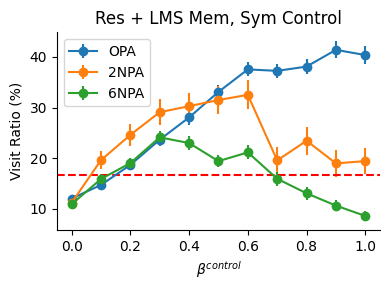

In [25]:
# plot digrate vs beta

ctype = 'Neural' if usenmc else 'Sym'
ptype = 'EH' if stochlearn else 'LMS'

if mtype =='res':
    title = f'{mtype.capitalize()} + {ptype} Mem, {ctype} Control'
else:
    title = f'{mtype.capitalize()} Mem, {ctype} Control'

labels = ['OPA','2NPA','6NPA']
plt.figure(figsize=(4,3))
for i, label in enumerate(labels):
    num_non_nan = np.sum(~np.isnan(digtimes[:,:,i+3]), axis=1)
    print(num_non_nan)
    plt.errorbar(beta_vals, np.nanmean(digtimes[:,:,i+3], axis=1), yerr=np.nanstd(digtimes[:,:,i+3], axis=1)/np.sqrt(num_non_nan), fmt='-o', label=label)
plt.xlabel('$\\beta^{control}$')
plt.ylabel('Visit Ratio (%)')
plt.title(title)
# remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axhline(y=100/6, color='r', linestyle='--')
plt.legend()
plt.tight_layout()
# plt.grid()

if mtype =='res':
    plt.savefig(f'./figs/obs_{mtype}_{ctype}_{ptype}_dig_vs_beta_{glr}glr.pdf',bbox_inches='tight')
else:
    plt.savefig(f'./figs/obs_{mtype}_{ctype}_{ptype}_dig_vs_beta.pdf',bbox_inches='tight')

In [33]:
data_dir = '/n/netscratch/pehlevan_lab/Lab/mgk/schema/cb_data_glr'

beta_vals = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
seeds = 100
trials = 50
mtypes = ['sym', 'res']  # 'sym' or 'res'
usenmcs = [False, True]

stochlearns = [False, True]
glr = 1e-4


combinations = [['sym', False, None],['res', False, True], ['res', False, False], ['sym', True, None],['res', True, True], ['res', True, False]]


all_digtimes = np.zeros((6, len(beta_vals), seeds, 6))

for i, (mtype, usenmc, stochlearn) in enumerate(combinations):

    for b,beta in enumerate(beta_vals):
        for s in range(seeds):

            try:
                if mtype == 'sym':
                    data = np.load(f'{data_dir}/obs_{mtype}_cb{beta}_{s}s_{usenmc}nmc.npz')
                else:
                    data = np.load(f'{data_dir}/obs_{mtype}_cb{beta}_{s}s_{usenmc}nmc_{stochlearn}sl_{glr}glr.npz')

                all_digtimes[i, b,s,:] = data['totdgr']
                # print(f"Loaded data for beta={beta}, seed={s}")
            except (FileNotFoundError, ValueError):
                print(f"File not found: {data_dir}/obs_{mtype}_cb{beta}_{s}.npz")
                all_digtimes[i, b,s,:] = np.nan

File not found: /n/netscratch/pehlevan_lab/Lab/mgk/schema/cb_data_glr/obs_sym_cb0.7_83.npz
File not found: /n/netscratch/pehlevan_lab/Lab/mgk/schema/cb_data_glr/obs_sym_cb0.7_94.npz
File not found: /n/netscratch/pehlevan_lab/Lab/mgk/schema/cb_data_glr/obs_sym_cb0.7_95.npz
File not found: /n/netscratch/pehlevan_lab/Lab/mgk/schema/cb_data_glr/obs_sym_cb0.8_36.npz
File not found: /n/netscratch/pehlevan_lab/Lab/mgk/schema/cb_data_glr/obs_sym_cb0.8_37.npz
File not found: /n/netscratch/pehlevan_lab/Lab/mgk/schema/cb_data_glr/obs_sym_cb0.8_38.npz
File not found: /n/netscratch/pehlevan_lab/Lab/mgk/schema/cb_data_glr/obs_sym_cb0.8_39.npz
File not found: /n/netscratch/pehlevan_lab/Lab/mgk/schema/cb_data_glr/obs_sym_cb0.8_41.npz
File not found: /n/netscratch/pehlevan_lab/Lab/mgk/schema/cb_data_glr/obs_sym_cb0.8_42.npz
File not found: /n/netscratch/pehlevan_lab/Lab/mgk/schema/cb_data_glr/obs_sym_cb0.8_43.npz
File not found: /n/netscratch/pehlevan_lab/Lab/mgk/schema/cb_data_glr/obs_sym_cb0.8_44.npz

[100 100 100 100 100 100 100 100 100 100 100]
[100 100 100 100 100 100 100 100 100 100 100]
[100 100 100 100 100 100 100 100 100 100 100]
[100 100 100 100 100 100 100 100 100 100 100]
[100 100 100 100 100 100 100 100 100 100 100]
[100 100 100 100 100 100 100 100 100 100 100]
[100 100 100 100 100 100 100 100 100 100 100]
[100 100 100 100 100 100 100 100 100 100 100]
[100 100 100 100 100 100 100 100 100 100 100]
[100 100 100 100 100 100 100  97  88  75  58]
[100 100 100 100 100 100 100  97  88  75  58]
[100 100 100 100 100 100 100  97  88  75  58]
[100 100 100 100 100 100 100 100 100 100 100]
[100 100 100 100 100 100 100 100 100 100 100]
[100 100 100 100 100 100 100 100 100 100 100]
[100 100 100 100 100 100 100 100 100 100 100]
[100 100 100 100 100 100 100 100 100 100 100]
[100 100 100 100 100 100 100 100 100 100 100]


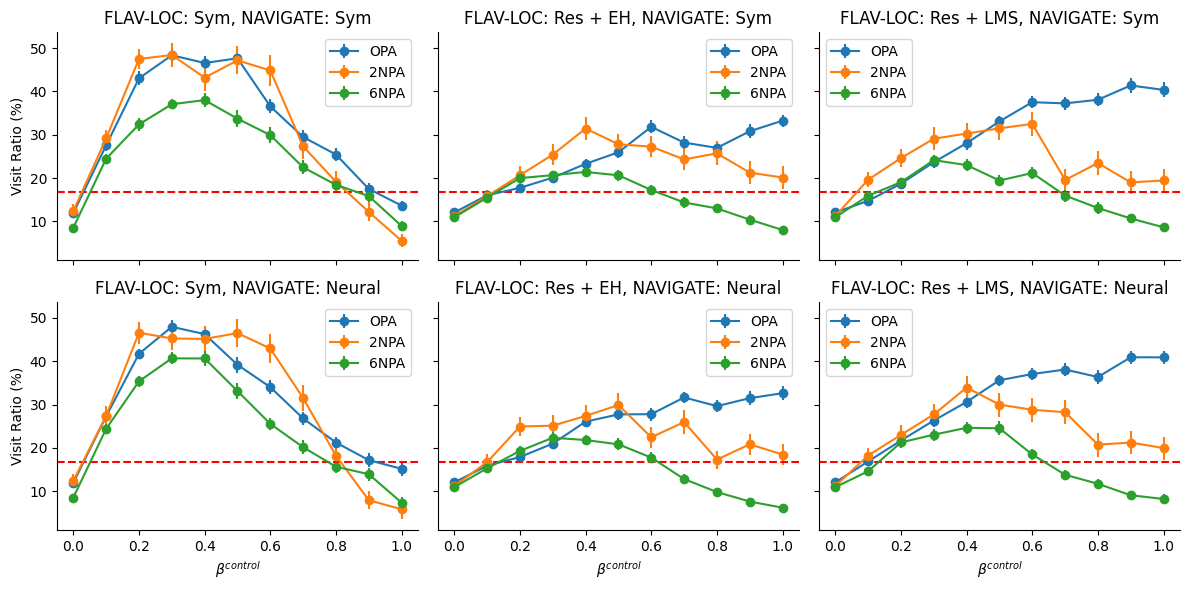

In [35]:
f,axs = plt.subplots(2,3, figsize=(4*3,3*2), sharey=True, sharex=True)
axs = axs.flatten()

for i, (mtype, usenmc, stochlearn) in enumerate(combinations):

    ctype = 'Neural' if usenmc else 'Sym'
    ptype = 'EH' if stochlearn else 'LMS'

    if mtype =='res':
        title = f'FLAV-LOC: {mtype.capitalize()} + {ptype}, NAVIGATE: {ctype}'
    else:
        title = f'FLAV-LOC: {mtype.capitalize()}, NAVIGATE: {ctype}'

    labels = ['OPA','2NPA','6NPA']

    for c, label in enumerate(labels):
        num_non_nan = np.sum(~np.isnan(all_digtimes[i,:, :,c+3]), axis=1)
        print(num_non_nan)
        axs[i].errorbar(beta_vals, np.nanmean(all_digtimes[i,:, :,c+3], axis=1), yerr=np.nanstd(all_digtimes[i,:, :,c+3], axis=1)/np.sqrt(num_non_nan), fmt='-o', label=label)
    if i >2:
        axs[i].set_xlabel('$\\beta^{control}$')
    if i == 0 or i == 3:
        axs[i].set_ylabel('Visit Ratio (%)')
    axs[i].set_title(title)
    # remove top and right spines
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].axhline(y=100/6, color='r', linestyle='--')
    axs[i].legend()

    # plt.grid()

f.tight_layout()
f.savefig(f'./figs/combine_obs_dig_vs_beta.pdf',bbox_inches='tight')
f.savefig(f'./figs/combine_obs_dig_vs_beta.png',bbox_inches='tight', dpi=300)